# Food Sales Application

# Table of contents

1. [Project Description](#ProjectDescription)
2. [Step 1. Open the data file and study the general information.](#OpenData&GeneralInfo)
3. [Step 2. Prepare the data for analysis](#PrepareData)
4. [Step 3. Study and check the data](#StudyCheck)
6. [Step 4. Study the event funnel](#EventFunnel)
7. [Step 5. ](#)
8. [General Conclusion](#Conclusion)

### Project Description. <a name="ProjectDescription"></a>

|  Name  |  Description  |
| :----: |  :---- |
|  **Initial conditions**  | You work at a startup that sells food products. You need to investigate user behavior for the company's app.                                            | 
|  **What we have**        | Then look at the results of an A/A/B test. (Read on for more information about A/A/B testing.) The designers would like to change the fonts for the entire app, but the managers are afraid the users might find the new design intimidating. They decide to make a decision based on the results of an A/A/B test.                    |
|  **Main question of project**  |  Will changes by application-wide font designers affect user behavior?                                                                            |
| **Project Description**  | [Link to Project Description](https://practicum.yandex.com/learn/data-analyst/courses/aaa92c32-5b7b-4eec-8a13-d1e099ee0be2/sprints/5646/topics/f9207047-1e54-4a62-ba08-0390dda7e4d5/lessons/6d5ba27b-3801-455b-94c7-96dca20f7495/)                                                                                                                                               |
| **Datasets**             | [/datasets/logs_exp_us.csv](https://code.s3.yandex.net/datasets/logs_exp_us.csv)                                                                       |

### Step 1. Open the data file and study the general information. <a name="OpenData&GeneralInfo"></a>

In [472]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import datetime as dt
import plotly
import plotly.express as px
from plotly import graph_objects as go
import math
import sys

pd.set_option('max_colwidth', 400)

sns.set()

In [473]:
print('Pandas version library:',pd.__version__)
print('Numpy version library:', np.__version__)
print('Seaborn version library:', sns.__version__)
print('Anaconda version package:', sys.version)
print('Plotly version package:', plotly.__version__)

Pandas version library: 0.25.1
Numpy version library: 1.19.5
Seaborn version library: 0.9.0
Anaconda version package: 3.7.8 | packaged by conda-forge | (default, Nov 17 2020, 23:45:15) 
[GCC 7.5.0]
Plotly version package: 4.1.0


In [474]:
df_data = pd.read_csv('https://code.s3.yandex.net/datasets/logs_exp_us.csv', sep="\t")

In [475]:
# function to determine if columns in file have null values:
def get_percent_of_na(df, num):
    count = 0; # first reset counter.
    df = df.copy() # copy dataframe in new structure.
    amount = (df.isna().sum() / df.shape[0])
    
    for column, percent in zip(amount.index, amount.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
        
    if count != 0:
        print('\033[1m' + 'There are {} columns with NA.'.format(count) + '\033[0m')
    else: 
        print()
        print('\033[1m' + 'There are no columns with NA.' + '\033[0m')

In [476]:
def get_percent_of_na_table(df, num):
    df_nulls = pd.DataFrame(df.isna().sum(), columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0], num) * 100
    return df_nulls

In [477]:
# function to display helpfull information about each file.
def get_info(df):
    print('Head:')
    display(df.head())
    print('-'*110)
    
    print('Info:')
    display(df.info())
    print('-'*110)
    
    print('Describe:')
    display(df.describe())
    display(df.describe(include=['category', 'object', 'float64']))
    print('-'*110)
    
    print('Percent of columns with nulls:')
    display(get_percent_of_na_table(df, 2))
    print('-'*110)
    
    print('Shape:')
    print(df.shape)
    print('-'*110)
    
    print('Duplicated:')
    print('\033[1m' + 'We have {} duplicated rows. \n'.format(df.duplicated().sum()) + '\033[0m')
    print('/'*110)

In [478]:
get_info(df_data)

Head:


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,DeviceIDHash,EventTimestamp,ExpId
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


,EventName
count,244126
unique,5
top,MainScreenAppear
freq,119205


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
EventName,0,0.0
DeviceIDHash,0,0.0
EventTimestamp,0,0.0
ExpId,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(244126, 4)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 413 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


> * In dataset no missing values, but exist 413 duplicated rows.

#### Step 2. Prepare the data for analysis <a name="PrepareData"></a>

> * Since the number of lines in which there is duplicate data is a small amount (413 rows) of the total number of lines (244126 rows), I decide to delete these duplicated lines.

In [479]:
print("Percentage of duplicated values: {:.2%}".format(df_data.duplicated().sum() / df_data.shape[0]))

Percentage of duplicated values: 0.17%


In [480]:
df_data.drop_duplicates(inplace=True)

In [481]:
get_info(df_data)

Head:


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 4 columns):
EventName         243713 non-null object
DeviceIDHash      243713 non-null int64
EventTimestamp    243713 non-null int64
ExpId             243713 non-null int64
dtypes: int64(3), object(1)
memory usage: 9.3+ MB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,DeviceIDHash,EventTimestamp,ExpId
count,2.437130e+05,2.437130e+05,243713.000000
mean,4.627963e+18,1.564914e+09,247.022161
std,2.642723e+18,1.771388e+05,0.824420
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


,EventName
count,243713
unique,5
top,MainScreenAppear
freq,119101


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
EventName,0,0.0
DeviceIDHash,0,0.0
EventTimestamp,0,0.0
ExpId,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(243713, 4)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [482]:
#converting timestamps
df_data['DateTime'] = df_data['EventTimestamp'].apply(lambda x: pd.datetime.fromtimestamp(x))
df_data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42


In [483]:
df_data['Date'] = df_data['DateTime'].dt.date
df_data['Time'] = df_data['DateTime'].dt.time
df_data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime,Date,Time
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25,04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25,11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25,11:48:42


> * Duplicate data in this dataset is 0.17%.
> * Duplicate data in the dataset has been removed as it does not have much impact on the statistics.
> * I converted and made 2 new Date and Time columns.

#### Step 3. Study and check the data <a name="StudyCheck"></a>

In [484]:
n_events = df_data.groupby('EventName').agg({'EventName':'nunique'}).sum().reset_index()
n_events.columns = ['EventName', 'nEvents']
display(n_events)

,EventName,nEvents
0,EventName,5


In [485]:
df_data['EventName'].value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: EventName, dtype: int64

In [486]:
n_users = df_data.groupby(['DeviceIDHash']).agg({'DeviceIDHash':'nunique'}).sum().reset_index()
n_users.columns = ['DeviceId', 'nUsers']
display(n_users)

,DeviceId,nUsers
0,DeviceIDHash,7551


In [487]:
totalNumberEvents = df_data['EventName'].value_counts().sum()
display(totalNumberEvents)

243713

In [488]:
AveNumPerUser = (totalNumberEvents / n_users['nUsers']).round()
print('Average number of events per user:', AveNumPerUser)

Average number of events per user: 0    32.0
Name: nUsers, dtype: float64


In [489]:
df_data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime,Date,Time
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25,04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25,11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25,11:48:42


In [490]:
DateMax = df_data['Date'].max()
print('Maximum date:', DateMax)

Maximum date: 2019-08-07


In [491]:
DateMin = df_data['Date'].min()
print('Minimum date:', DateMin)

Minimum date: 2019-07-25


In [492]:
def draw_hist(df, x, y, title, ylabel, xlabel):
    sns.set(style='dark')
    sns.set_style("whitegrid")
    plt.figure(figsize=(16,5))
    ax = sns.barplot(x=x, y=y, data=df)
    plt.locs, labels = plt.xticks()
    #plt.yticks(np.arange(160, 640, step=20))
    #plt.setp(labels, rotation=rotation)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()    

In [493]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

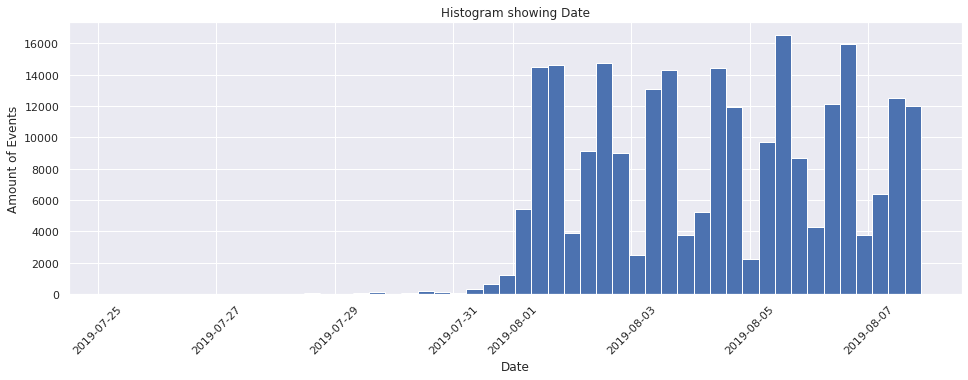

In [494]:
plt.figure(figsize=(16,5))
plt.locs, labels = plt.xticks()
#plt.yticks(np.arange(160, 640, step=20))
plt.setp(labels, rotation=45)
df_data['DateTime'].hist(bins=50)
plt.title('Histogram showing Date')
plt.ylabel('Amount of Events')
plt.xlabel('Date')
plt.show() 

> * This graph shows the distribution of the number of events in applications by date.
> * According to the histogram, there was not any big activity on the app until August 1st. I can assume that prior to this date, the advertising campaign had not been launched and the users were not aware of this application.
> * Unfortunately no more information on the details.

In [495]:
df_data['Date'] = pd.to_datetime(df_data['Date'])
new_df_data = df_data.loc[df_data['Date'] > '2019-07-31']

In [496]:
new_df_data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime,Date,Time
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01,00:07:28
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01,00:08:00
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01,00:08:55
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01,00:08:58
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01,00:08:59


In [497]:
print('New data slice:', new_df_data.shape[0])
print('Prev. data slice:', df_data.shape[0])
print('Lost {:} observations'.format(df_data.shape[0] - new_df_data.shape[0]))
print('Lost {:.2%} observations from entire observations.'.format((df_data.shape[0] - new_df_data.shape[0])/df_data.shape[0]))

New data slice: 240887
Prev. data slice: 243713
Lost 2826 observations
Lost 1.16% observations from entire observations.


In [498]:
groups = new_df_data.groupby('ExpId').size().reset_index(name='Counts')
display(groups)

,ExpId,Counts
0,246,79302
1,247,77022
2,248,84563


> * In the current dataset, 5 main user actions are highlighted for the food selling application.
> * The largest number of actions occurs on the main screen of the application - 119101 and the smallest on the tutorial screen. Least of all people want to be trained in this application. It can be concluded that the application is intuitively understandable. It's good.
> * Judging by the date and time of using the application, you can see that active user actions begin on July 31, 2019, so we can create a new dataset by excluding earlier dates. In this case, the dataset has a date range from 25.07.2019-07.08.2019. 
When creating a new data slice, 2826 observations were lost (1.16%).

#### Step 4. Study the event funnel <a name="EventFunnel"></a>

- [X] See what events are in the logs and their frequency of occurrence. Sort them by frequency.

In [499]:
eventsNames = new_df_data.groupby('EventName').agg({'DeviceIDHash':'count'}).sort_values(by='DeviceIDHash', ascending=False).reset_index()
eventsNames.head()

,EventName,DeviceIDHash
0,MainScreenAppear,117328
1,OffersScreenAppear,46333
2,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


In [500]:
usersActions = new_df_data.groupby('EventName').agg({'DeviceIDHash':'nunique'}).sort_values(by='DeviceIDHash', ascending=False).reset_index()
usersActions.head()

,EventName,DeviceIDHash
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


> - I think that the sequence of user actions is as follows:
> 1. Opening the main screen.
> 2. Suggestion screen.
> 3. Adding purchases to the cart - cart screen.
> 4. Successful payment.
> 5. The least popular, judging by the data, is the tutorial screen. It can be omitted from the funnel.

In [501]:
new_df_data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime,Date,Time
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01,00:07:28
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01,00:08:00
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01,00:08:55
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01,00:08:58
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01,00:08:59


In [502]:
usersVsAction = new_df_data.pivot_table(
    index='DeviceIDHash', 
    columns='EventName', 
    values='DateTime',
    aggfunc='min')

display(usersVsAction.head())

EventName,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
DeviceIDHash,,,,,
6888746892508752,NaT,2019-08-06 14:06:34,NaT,NaT,NaT
6909561520679493,2019-08-06 18:52:58,2019-08-06 18:52:54,2019-08-06 18:53:04,2019-08-06 18:52:58,NaT
6922444491712477,2019-08-04 14:19:40,2019-08-04 14:19:33,2019-08-04 14:19:46,2019-08-04 14:19:40,NaT
7435777799948366,NaT,2019-08-05 08:06:34,NaT,NaT,NaT
7702139951469979,2019-08-02 14:28:45,2019-08-01 04:29:54,2019-08-01 04:29:56,2019-08-02 14:28:45,NaT


Each table row presents a user. The columns contain the time each of the events first occurred. If the event didn't take place, its cell value is NaT.

In [503]:
# The number of users reaching Stage 1 (accessed the main screen)
NumberMainScreen = usersVsAction[~usersVsAction['MainScreenAppear'].isna()].shape[0]
print('The number of users reached Stage# 1: accessed the Main Screen:', NumberMainScreen)

The number of users reached Stage# 1: accessed the Main Screen: 7419


In [504]:
# The number of users reaching Stage 2 (accessed the main screen & offers screen)
NumberOfferScreen = usersVsAction[~usersVsAction['MainScreenAppear'].isna() & 
                    (usersVsAction['OffersScreenAppear'] > usersVsAction['MainScreenAppear'])].shape[0]
print('The number of users reached Stage# 2: accessed the Main Screen and Offers Screen:', NumberOfferScreen)

The number of users reached Stage# 2: accessed the Main Screen and Offers Screen: 4201


In [505]:
# The number of users reaching Stage 3 (accessed the main screen & offers screen & payment screen)
NumberCartScreen =   usersVsAction[~usersVsAction['MainScreenAppear'].isna() & 
                                      ~usersVsAction['OffersScreenAppear'].isna() & 
                                      (usersVsAction['CartScreenAppear'] > usersVsAction['OffersScreenAppear'])].shape[0]
print('The number of users reached Stage# 3: accessed the Main Screen, Offers Screen and Cart Screen:', NumberCartScreen)

The number of users reached Stage# 3: accessed the Main Screen, Offers Screen and Cart Screen: 1967


In [506]:
# The number of users reaching Stage 4 (accessed the main screen & offers screen & payment screen & tutorial)
NumberPaymentScreen = usersVsAction[~usersVsAction['MainScreenAppear'].isna() & 
                                 ~usersVsAction['OffersScreenAppear'].isna() & 
                                 ~usersVsAction['CartScreenAppear'].isna() &
                                (usersVsAction['PaymentScreenSuccessful'] > usersVsAction['CartScreenAppear'])].shape[0]
print('The number of users reached Stage# 4: accessed the Main Screen, Offers Screen, Cart Screen and Payment Screen:', NumberPaymentScreen)

The number of users reached Stage# 4: accessed the Main Screen, Offers Screen, Cart Screen and Payment Screen: 936


In [507]:
# The number of users reaching Stage 4 (accessed the main screen & offers screen & payment screen & tutorial)
TutorialScreen = usersVsAction[~usersVsAction['MainScreenAppear'].isna() & 
                               ~usersVsAction['OffersScreenAppear'].isna() & 
                               ~usersVsAction['CartScreenAppear'].isna() &
                               ~usersVsAction['PaymentScreenSuccessful'].isna() &
                              (usersVsAction['Tutorial'] > usersVsAction['PaymentScreenSuccessful'])].shape[0]
print('The number of users reached Stage# 5: accessed the Main Screen, Offers Screen, Cart Screen, Payment Screen and Tutorial:', TutorialScreen)

The number of users reached Stage# 5: accessed the Main Screen, Offers Screen, Cart Screen, Payment Screen and Tutorial: 7


In [508]:
Stage2_stage1 = NumberOfferScreen / NumberMainScreen
Stage3_stage2 = NumberCartScreen / NumberOfferScreen
Stage4_stage3 = NumberPaymentScreen / NumberCartScreen
Stage5_stage4 = TutorialScreen / NumberPaymentScreen
Stage5_stage1 = (NumberPaymentScreen / NumberMainScreen)

print('Ratio Stage 2 to Stage 1: {:.2f}'.format(Stage2_stage1))
print('Ratio Stage 3 to Stage 2: {:.2f}'.format(Stage3_stage2))
print('Ratio Stage 4 to Stage 3: {:.2f}'.format(Stage4_stage3))
print('Ratio Stage 5 to Stage 4: {:.2f}'.format(Stage5_stage4))
print('Ratio Stage Payment Screen to Main Screen: {:.2f}'.format(Stage5_stage1))

Ratio Stage 2 to Stage 1: 0.57
Ratio Stage 3 to Stage 2: 0.47
Ratio Stage 4 to Stage 3: 0.48
Ratio Stage 5 to Stage 4: 0.01
Ratio Stage Payment Screen to Main Screen: 0.13


In [509]:
usersActions.head()

,EventName,DeviceIDHash
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


In [510]:
fig = go.Figure(go.Funnel(
    y = ["Main Screen", "Offers Screen", "Cart Screen", "Payment Screen"],
    x = [7423, 4595, 3735, 3539]))

fig.show()

In [511]:
# Data on stages in proportions.
print((usersActions['DeviceIDHash'] / new_df_data.DeviceIDHash.nunique()))

0    0.984736
1    0.609636
2    0.495620
3    0.469737
4    0.111495
Name: DeviceIDHash, dtype: float64


In [512]:
# Data by stages in percent
print((usersActions['DeviceIDHash'] / new_df_data.DeviceIDHash.nunique()) * 100)

0    98.473586
1    60.963632
2    49.561986
3    46.973719
4    11.149456
Name: DeviceIDHash, dtype: float64


> * At the first stage, when users have to go from the main screen to the offer screen: 0.37 (lost 37% of users)

> * 0.46 of users go all the way from the first event to payment. (46% of all users, which started to use application)

You can also use a visualization methos as a solution for the last two problems. A funnel chart would look great: https://plotly.com/python/funnel-charts/

#### Step 5. Study the results of the experiment <a name="Experiment"></a>

In [513]:
new_df_data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime,Date,Time
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01,00:07:28
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01,00:08:00
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01,00:08:55
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01,00:08:58
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01,00:08:59


In [514]:
usersPerGroup = new_df_data.groupby(['ExpId']).agg({'DeviceIDHash':'nunique'}).reset_index()
display(usersPerGroup)

,ExpId,DeviceIDHash
0,246,2484
1,247,2513
2,248,2537


Let us formulate hypotheses and then check them: 
 - H_0: (the null hypothesis): There is no statistically significant difference for group 246 and 247.
 - H_a: (the alternative hypothesis): There is statistically significant difference for group 246 and 247.

In [515]:
new_df_data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime,Date,Time
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01,00:07:28
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01,00:08:00
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01,00:08:55
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01,00:08:58
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01,00:08:59


In [516]:
ExpIdGroups = new_df_data.pivot_table(index='EventName', values='DeviceIDHash', columns='ExpId', aggfunc=lambda x: x.nunique()).reset_index()
display(ExpIdGroups)
group_246 = ExpIdGroups[246]
group_247 = ExpIdGroups[247]

ExpId,EventName,246,247,248
0,CartScreenAppear,1266,1238,1230
1,MainScreenAppear,2450,2476,2493
2,OffersScreenAppear,1542,1520,1531
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,279


In [517]:
def test_hyp(sample_1, sample_2):
    alpha = 0.05
    results = st.ttest_ind(sample_1, sample_2)
    print('p-value: ', results.pvalue)

    if results.pvalue < alpha:
        print("We reject the null hypothesis")
    else:
        print("We can't reject the null hypothesis") 

In [518]:
test_hyp(group_246, group_247)

p-value:  0.9809573661651472
We can't reject the null hypothesis


In [519]:
# Figure the most popular event
popularEvents = new_df_data['EventName'].value_counts()
display(popularEvents.head())

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: EventName, dtype: int64

Let us formulate all hypothesis: 
 - H_0: (the null hypothesis): There is no statistically significant difference for MainScreenAppear between the groups 246 and 247.
 - H_a: (the alternative hypothesis): There is statistically significant difference for MainScreenAppear between the groups 246 and 247.
>  
  - H_0: (the null hypothesis): There is no statistically significant difference for OfferScreenAppear between the groups 246 and 247.
 - H_a: (the alternative hypothesis): There is statistically significant difference for OfferScreenAppear between the groups 246 and 247.
>  
  - H_0: (the null hypothesis): There is no statistically significant difference for CartScreenAppear between the groups 246 and 247.
 - H_a: (the alternative hypothesis): There is statistically significant difference for CartScreenAppear between the groups 246 and 247.
> 
 - H_0: (the null hypothesis): There is no statistically significant difference for PaymentScreenSuccessful between the groups 246 and 247.
 - H_a: (the alternative hypothesis): There is statistically significant difference for PaymentScreenSuccessful between the groups 246 and 247.

In [520]:
display(ExpIdGroups)

ExpId,EventName,246,247,248
0,CartScreenAppear,1266,1238,1230
1,MainScreenAppear,2450,2476,2493
2,OffersScreenAppear,1542,1520,1531
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,279


In [521]:
def check_hypothesis(Group1, Group2, eventName): 

    # define alpha value
    alpha = 0.05

    # define successes 
    successes_1 = ExpIdGroups[ExpIdGroups.EventName == eventName][Group1].iloc[0]
    successes_2 = ExpIdGroups[ExpIdGroups.EventName == eventName][Group2].iloc[0]

    # define trials
    trialsGroup_1 = new_df_data[new_df_data.ExpId == Group1]['DeviceIDHash'].nunique()
    trialsGroup_2 = new_df_data[new_df_data.ExpId == Group2]['DeviceIDHash'].nunique()    

    # proportion for success in group 1
    p1 = successes_1 / trialsGroup_1

    # proportion for success in group 2
    p2 = successes_2 / trialsGroup_2

    # proportion in a combined dataset
    p_combined = (successes_1 + successes_2) / (trialsGroup_1 + trialsGroup_2)

    # define difference and z value
    difference = p1 - p2
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trialsGroup_1 + 1/trialsGroup_2))

    # calculate distribution
    distr = st.norm(0,1)

    # calculate p_value
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p_value: ', p_value)

    if (p_value < alpha):
        print("Rejecting the null hypothesis: there is a significant difference between the proportions")
    else:
        print("Failed to reject the null hypothesis: there is no reason to consider the proportions different") 

In [522]:
check_hypothesis(246, 247, 'MainScreenAppear')
check_hypothesis(246, 247, 'OffersScreenAppear')
check_hypothesis(246, 247, 'CartScreenAppear')
check_hypothesis(246, 247, 'PaymentScreenSuccessful')

p_value:  0.7570597232046099
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.2480954578522181
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.22883372237997213
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.11456679313141849
Failed to reject the null hypothesis: there is no reason to consider the proportions different


> * 0.675 > 0.05 -> we can't reject the null hypothesis; there's not a statistically significant difference for MainScreenAppear between the groups.
> * 0.243 > 0.05 -> we can't reject the null hypothesis; there's not a statistically significant difference for OffersScreenAppear between the groups.
> * 0.218 > 0.05 -> we can't reject the null hypothesis; there's not a statistically significant difference for CartScreenAppear between the groups.
> * 0.102 > 0.05 -> we can't reject the null hypothesis; there's not a statistically significant difference for PaymentScreenSuccessful between the groups.

Let us formulate all hypothesis: 
 - H_0: (the null hypothesis): There is no statistically significant difference for MainScreenAppear between the groups 246 and 248.
 - H_a: (the alternative hypothesis): There is statistically significant difference for MainScreenAppear between the groups 246 and 248.
>  
  - H_0: (the null hypothesis): There is no statistically significant difference for OfferScreenAppear between the groups 246 and 248.
 - H_a: (the alternative hypothesis): There is statistically significant difference for OfferScreenAppear between the groups 246 and 248.
>  
  - H_0: (the null hypothesis): There is no statistically significant difference for CartScreenAppear between the groups 246 and 248.
 - H_a: (the alternative hypothesis): There is statistically significant difference for CartScreenAppear between the groups 246 and 248.
> 
 - H_0: (the null hypothesis): There is no statistically significant difference for PaymentScreenSuccessful between the groups 246 and 248.
 - H_a: (the alternative hypothesis): There is statistically significant difference for PaymentScreenSuccessful between the groups 246 and 248.

In [523]:
check_hypothesis(246, 248, 'MainScreenAppear')
check_hypothesis(246, 248, 'OffersScreenAppear')
check_hypothesis(246, 248, 'CartScreenAppear')
check_hypothesis(246, 248, 'PaymentScreenSuccessful')

p_value:  0.2949721933554552
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.20836205402738917
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.07842923237520116
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.2122553275697796
Failed to reject the null hypothesis: there is no reason to consider the proportions different


Let us formulate all hypothesis: 
 - H_0: (the null hypothesis): There is no statistically significant difference for MainScreenAppear between the groups 247 and 248.
 - H_a: (the alternative hypothesis): There is statistically significant difference for MainScreenAppear between the groups 247 and 247.
>  
  - H_0: (the null hypothesis): There is no statistically significant difference for OfferScreenAppear between the groups 247 and 248.
 - H_a: (the alternative hypothesis): There is statistically significant difference for OfferScreenAppear between the groups 247 and 248.
>  
  - H_0: (the null hypothesis): There is no statistically significant difference for CartScreenAppear between the groups 247 and 248.
 - H_a: (the alternative hypothesis): There is statistically significant difference for CartScreenAppear between the groups 247 and 248.
> 
 - H_0: (the null hypothesis): There is no statistically significant difference for PaymentScreenSuccessful between the groups 247 and 248.
 - H_a: (the alternative hypothesis): There is statistically significant difference for PaymentScreenSuccessful between the groups 247 and 248.

In [524]:
check_hypothesis(247, 248, 'MainScreenAppear')
check_hypothesis(247, 248, 'OffersScreenAppear')
check_hypothesis(247, 248, 'CartScreenAppear')
check_hypothesis(247, 248, 'PaymentScreenSuccessful')

p_value:  0.4587053616621515
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.9197817830592261
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.5786197879539783
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.7373415053803964
Failed to reject the null hypothesis: there is no reason to consider the proportions different


> * I have set a certain significance level equal 0.05. 
> * 16 statistical hypothesis tests I carried out (added new 4 test hypothesis below)

> * There is no significant difference between the indicators for group A - 246 and group A - 247 (the A/A Test)
> * A / B testing for 2 groups A (246 and 247) with group B (248) did not reveal significant differences. This means that "Changing fonts for the entire application," will not entail significant changes in the fact that a large number of users will reach the last stage - the payment screen.

Let us formulate all hypothesis: 
 - H_0: (the null hypothesis): There is no statistically significant difference for MainScreenAppear between the combined group 246_247 and 248.
 - H_a: (the alternative hypothesis): There is statistically significant difference for MainScreenAppear between the combined group 246_247 and 248.
>  
  - H_0: (the null hypothesis): There is no statistically significant difference for OfferScreenAppear between the combined group 246_247 and 248.
 - H_a: (the alternative hypothesis): There is statistically significant difference for OfferScreenAppear between the combined group 246_247 and 248.
>  
  - H_0: (the null hypothesis): There is no statistically significant difference for CartScreenAppear between the combined group 246_247 and 248.
 - H_a: (the alternative hypothesis): There is statistically significant difference for CartScreenAppear between the combined group 246_247 and 248.
> 
 - H_0: (the null hypothesis): There is no statistically significant difference for PaymentScreenSuccessful between the combined group 246_247 and 248.
 - H_a: (the alternative hypothesis): There is statistically significant difference for PaymentScreenSuccessful between the combined group 246_247 and 248.

In [525]:
display(new_df_data.head())

,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime,Date,Time
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01,00:07:28
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01,00:08:00
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01,00:08:55
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01,00:08:58
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01,00:08:59


In [526]:
new_df_data['ExpId'].describe()

count    240887.000000
mean        247.021840
std           0.824489
min         246.000000
25%         246.000000
50%         247.000000
75%         248.000000
max         248.000000
Name: ExpId, dtype: float64

> * A new label-value has been set for the combined group 246 and 247. The new label is 245.

In [527]:
# set new column for combined group = 'CombinedGroup'
new_df_data['CombinedGroup'] = new_df_data['ExpId'].map({248:248, 246:245, 247:245})
display(new_df_data.head())

,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime,Date,Time,CombinedGroup
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01,00:07:28,245
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01,00:08:00,245
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01,00:08:55,245
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01,00:08:58,245
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01,00:08:59,245


In [528]:
display(new_df_data['CombinedGroup'].describe())

count    240887.000000
mean        246.053145
std           1.431897
min         245.000000
25%         245.000000
50%         245.000000
75%         248.000000
max         248.000000
Name: CombinedGroup, dtype: float64

In [529]:
# created new pivot table.
combined_group = new_df_data.pivot_table(index='EventName', values='DeviceIDHash', columns='CombinedGroup', aggfunc=lambda x: x.nunique()).reset_index()

In [530]:
display(combined_group.head())

CombinedGroup,EventName,245,248
0,CartScreenAppear,2504,1230
1,MainScreenAppear,4926,2493
2,OffersScreenAppear,3062,1531
3,PaymentScreenSuccessful,2358,1181
4,Tutorial,561,279


In [532]:
def check_hypothesis_combined(pivot, df, Group0, Group1, Group2, eventName): 

    # define alpha value
    alpha = 0.05

    # define successes 
    successes_1 = pivot[pivot.EventName == eventName][Group1].iloc[0]
    successes_2 = pivot[pivot.EventName == eventName][Group2].iloc[0]

    # define trials
    trialsGroup_1 = df[df[Group0] == Group1]['DeviceIDHash'].nunique()
    trialsGroup_2 = df[df[Group0] == Group2]['DeviceIDHash'].nunique()    

    # proportion for success in group 1
    p1 = successes_1 / trialsGroup_1

    # proportion for success in group 2
    p2 = successes_2 / trialsGroup_2

    # proportion in a combined dataset
    p_combined = (successes_1 + successes_2) / (trialsGroup_1 + trialsGroup_2)

    # define difference and z value
    difference = p1 - p2
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trialsGroup_1 + 1/trialsGroup_2))

    # calculate distribution
    distr = st.norm(0,1)

    # calculate p_value
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p_value: ', p_value)

    if (p_value < alpha):
        print("Rejecting the null hypothesis: there is a significant difference between the proportions")
    else:
        print("Failed to reject the null hypothesis: there is no reason to consider the proportions different") 

In [533]:
check_hypothesis_combined(combined_group, new_df_data, 'CombinedGroup', 245, 248, 'MainScreenAppear')
check_hypothesis_combined(combined_group, new_df_data, 'CombinedGroup', 245, 248, 'OffersScreenAppear')
check_hypothesis_combined(combined_group, new_df_data, 'CombinedGroup', 245, 248, 'CartScreenAppear')
check_hypothesis_combined(combined_group, new_df_data, 'CombinedGroup', 245, 248, 'PaymentScreenSuccessful')

p_value:  0.29424526837179577
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.43425549655188256
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.18175875284404386
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.6004294282308704
Failed to reject the null hypothesis: there is no reason to consider the proportions different


> * According to these data, we can also confirm that the hypotheses for the combined group A consisting of 2 groups - 246 and 247, in comparison with group 248, also does not make much difference. 
> * Thus, hypothesis testing comparing the combined group 246_247 and the control group 248 did not reveal a significant difference.

### General Conclusion: <a name="Conclusion"></a>

   Based on the previous data, the following conclusions can be drawn.
> * The current dataset of the operation of this application did not contain any missing values. But it contained duplicate data.
> * The dataset itself has a short period of time. Looking at the histogram, you can cut off the data until August 1, since the number of events in the application is about zero. It can be assumed that the application was not used up to this point, since it was not known to users. It may be necessary to conduct a larger advertising campaign.
> * Unfortunately, the application has problems with low conversion rates. A large number of users come to the Main screen, but many of the users do not make it to the product selection stage (Offers Screen). It is difficult to say what this is related to, but I would assume that it is related to the user-friendly application.
It seems that many users simply do not find the Offers Screen. I think need to pay attention to User Stories.
> * Regarding prices, it is possible to further consider introduction of promotional codes or promotions for free delivery for users, within 2-3 months.
> * I would suggest making improvements to the transition from the home screen to the suggestion screen. And test it with hypotheses for A / B tests. 
> * As the hypothesis test on changing the size of the fonts in the application has shown, this does not make sense. Users can read the title, but apparently they cannot find the product they would like to buy.